In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from gaussian_sampling import plot_sample_hist
from residue_sampling import *
from simple_harmonic_motion import plot_oscillator
from lennard_jones_MC import *

## Exercise 1

In [ ]:
hist = plot_sample_hist(2000, 2, 3, 10, save=True, out_file="../../data/normalHist.png")

## Exercise 2

In [ ]:
uniform_sequence = ''.join(uniform_sampling(300))
uniform_sequence

In [ ]:
# calculate the frequencies of each amino acid in the above sequence
freqs = {}
for amino_acid in amino_acid_keys.values():
    freqs[amino_acid] = uniform_sequence.count(amino_acid) / 300
print("Frequency of AA In Uniform Distribution")
print(freqs)

In [ ]:
# sampling from the uniprot frequency data
actualSequence = ''.join(swiss_prot_sampling(300))
actualSequence

In [ ]:
freqs = {}
for amino_acid in amino_acid_scale_values.keys():
    freqs[amino_acid] = actualSequence.count(amino_acid) / 300
print("Frequency of AA Sampled from SwissProtKB Database")
print(freqs)

In [ ]:
fig, ax = plt.subplots()
ax.bar(amino_acid_scale_values.keys(), [a / 100 for a in amino_acid_scale_values.values()])
plt.title("Amino Acid Frequency in SwissProt Database")
plt.xlabel("Amino Acid")
plt.ylabel("Sequence Frequency (%)")
plt.savefig("../../data/swissAAFreq.png")

## Exercise 3

In [11]:
coordinates = np.loadtxt("../../data/init_crds_boxl_3.5-2.dat")
coordinates_df = pd.DataFrame(coordinates, columns=["x", "y", "z"])
coordinates_df.head()

,x,y,z
0,-1.201964,0.049374,1.344669
1,0.957627,0.115361,-1.353307
2,-0.188974,0.523728,-1.365142
3,-1.619914,-0.040959,0.190333
4,1.541204,-0.756257,-1.000095


In [9]:
initial_potential = calculate_configuration_potential(coordinates_df, 0.25, 1, 3.5)
print(initial_potential, "J")

-29.47211501742229 J


In [12]:
monte_carlo(10000, coordinates_df, 0.1, 0.25, 1, 3.5, kt=1)

-28.38912397510439

In [14]:
coordinates = np.loadtxt("../../data/init_crds_boxl_3.5-2.dat")
coordinates_df = pd.DataFrame(coordinates, columns=["x", "y", "z"])
monte_carlo(10000, coordinates_df, 0.1, 0.25, 1, 3.5, kt=2)

14.247118494201946

In [15]:
coordinates = np.loadtxt("../../data/init_crds_boxl_3.5-2.dat")
coordinates_df = pd.DataFrame(coordinates, columns=["x", "y", "z"])
monte_carlo(10000, coordinates_df, 0.1, 0.25, 1, 3.5, kt=0.2)

-29.857583908039437

## Exercise 5

<Axes: title={'center': 'Position, Velocity, and Force \n Over Time for the Simple Bond Oscillation'}, xlabel='time (s)'>

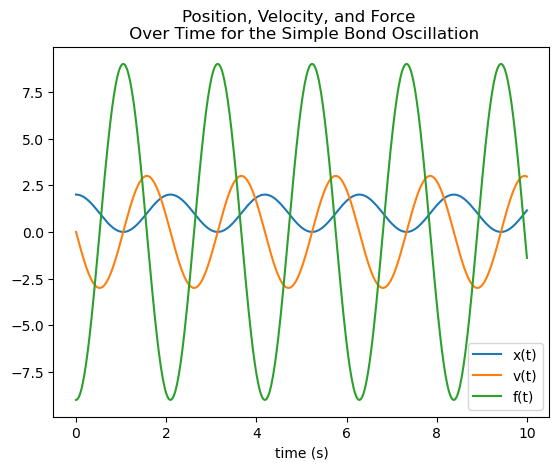

In [16]:
x_0 = 1
w = 3
m = 1
range = 10

plot_oscillator(range, w, x_0, m, save_file=True, save_location="../../data/oscillator.png")